# Ecuacion de Dirichlet 
Inciso b)

La solución de la ecuación 
$$\frac{\partial ^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}=0$$
sujeta a las condiciones de frontera:
$$u(x,0)=u(x,1)=0, \;\;\; 0<x<1$$
Y la condición inicial:
$$u(0,y)=0,\hspace{1cm} u_x(1,y)=10y\;\;\;0<y<1$$

Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,y)=20\sum_{n=1}^{\infty}\frac{(-1)^{n+1}}{n^2\pi ^2cosh(n\pi)}senh(n\pi x)sen(n\pi y)$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from math import *
from pylab import *

Para empezar, graficamos la condición inicial. $$u_x(1,y)=10y$$

In [6]:
recta = lambda x: 10*x

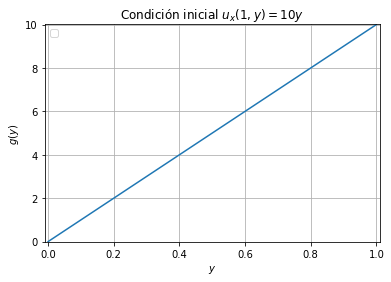

In [7]:
x = []
y = []
for k in range(101):
  x.append(0.01*k)
  y.append(recta(0.01*k))

plt.plot(x,y)
plt.xlabel('$y$'); plt.ylabel('$g(y)$'); 
plt.title("Condición inicial $u_x(1,y)=10y$")
xlim([-0.01,1.01]),ylim([-0.01,10.01]),grid(),legend()
show()



Usamos una serie de Fourier para aproximar la condición inicial $u_x(1,y)=10y$

In [9]:
def Serie(x,N): # N es el número de armónicos
    f = 0
    for n in range(1,N+1):
        f += ((-1)**(n+1)/n)*sin(n*pi*x)
    return (20/pi)*f

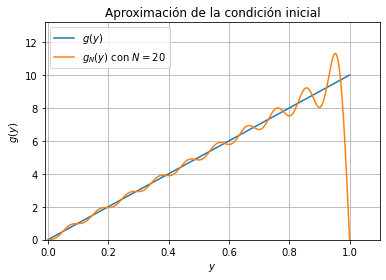

In [10]:
x_1=[]
y_1=[]
for i in range(1001):
  x_1.append(0.001*i)
  y_1.append(Serie(0.001*i,20))

plt.plot(x,y,label='$g(y)$')
plt.plot(x_1,y_1,label='$g_N(y)$ con $N=20$')
plt.xlabel('$y$'); plt.ylabel('$g(y)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,13.2]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

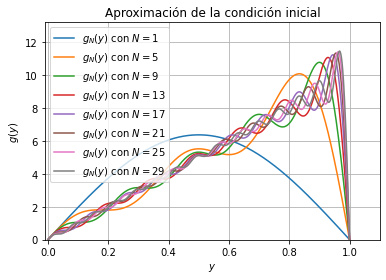

In [14]:
def Fourier(lista,N):
  l=[]
  for t in range(len(lista)):
    l.append(Serie(lista[t],N))
  return l

for i in range(1,30,4):
    plt.plot(x_1,Fourier(x_1,i),label='$g_N(y)$ con $N=%d$' %i)

plt.xlabel('$y$'); plt.ylabel('$g(y)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,13.2]),grid(),legend()
show()


Ahora, para visualizar la solución completa. Primero, para el primer punto, $y=0$.

In [16]:
# funcion con 50 armonicos
def u(x,y):
  s = 0
  for n in range(1,51):
    s += ((-1)**(n+1)/(cosh(n*pi)*n**2))*sinh(n*pi*x)*sin(n*pi*y)
  return (20/pi**2)*s

y2=[]
for n2 in range(len(x_1)):
  y2.append(u(0,y_1[n2]))


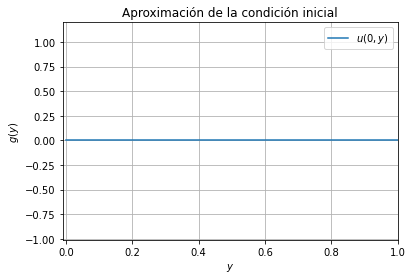

In [21]:
plt.plot(x_1,y2,label='$u(0,y)$')
plt.xlabel('$y$'); plt.ylabel('$g(y)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.0]),ylim([-1.01,1.2]),grid(),legend()
show()

Luego, para diferentes valores de $x$, lo cual nos permite ver cómo la solución evoluciona.

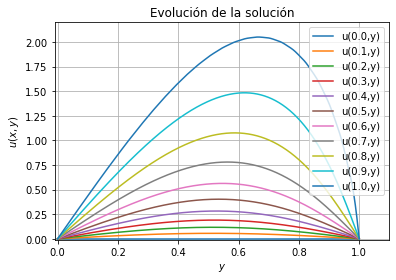

In [31]:
def u_n(x,lista):
  l=[]
  for n in range(len(lista)):
    l.append(u(x,lista[n]))
  return l

for t_2 in range(0,11,1):
  v = round( 0.1*t_2 , 2 )
  plt.plot(x_1,u_n(0.1*t_2,x_1), label='u(%r,y)'%v)

plt.xlabel('$y$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.1]),ylim([-0.01,2.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

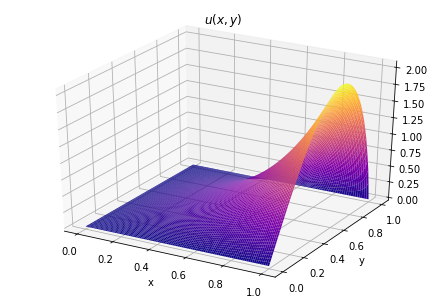

In [35]:

a = []
b = []

for j in range(101):
  a.append(0.01*j)
  b.append(0.01*j)

a,b=np.meshgrid(a,b)

# función u(x,y)
def l(x,y):
  m = np.zeros(np.shape(x))
  for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
      m[i][j]=u(x[i][j],y[i][j])
  return m

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(a,b,l(a,b), rstride=1, cstride=1, cmap=cm.plasma)

plt.xlabel('x')
plt.ylabel('y')

plt.title('$u(x,y)$')
plt.show()
